<a href="https://colab.research.google.com/github/Nickqq627/7112029017/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANN


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


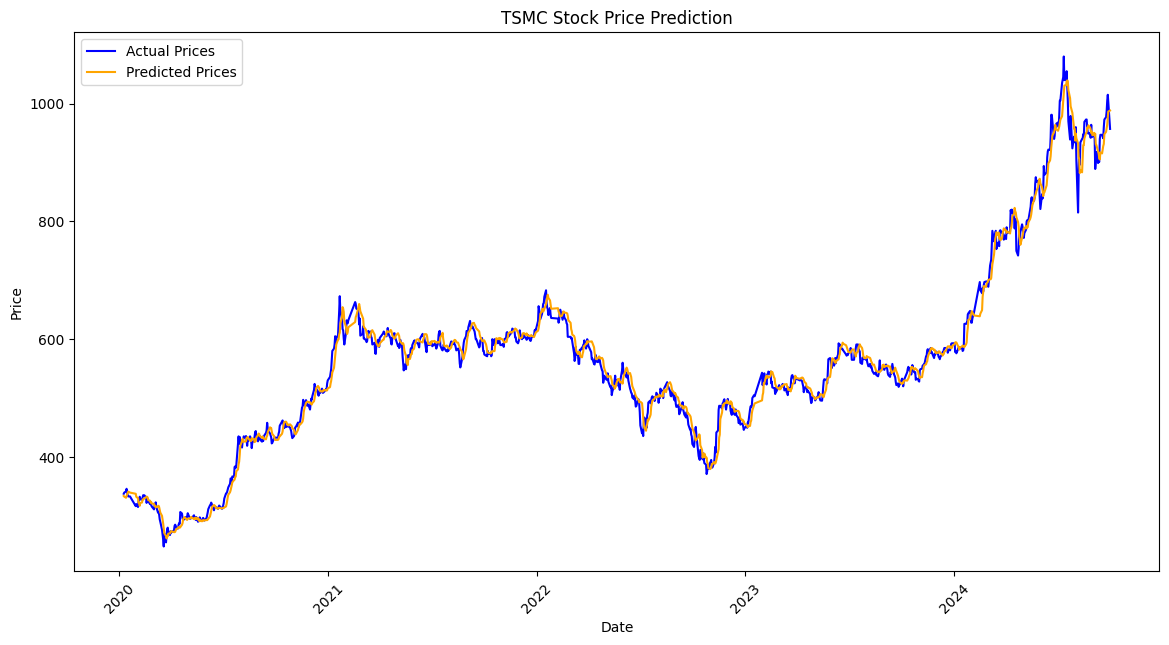

In [36]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 下載股票數據
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2020-01-01", end="2024-10-01")
    return data

# 數據預處理
def preprocess_data(data, n_days):
    # 取收盤價
    close_prices = data['Close'].values

    # 使用 MinMaxScaler 將數據歸一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

    # 構建特徵和標籤
    x, y = [], []
    for i in range(len(scaled_data) - n_days):
        x.append(scaled_data[i:i + n_days].flatten())
        y.append(scaled_data[i + n_days])

    return np.array(x), np.array(y), scaler, scaled_data

# 下載數據並進行預處理
data = get_stock_data()
n_days = 5  # 預測N日後的股價
x, y, scaler, scaled_data = preprocess_data(data, n_days)

# 分割數據集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 構建神經網絡模型
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_days,)),  # 第一層
    layers.Dense(32, activation='relu'),              # 第二層
    layers.Dense(1)                         # 輸出層
])

# 設定損失函數和優化器
model.compile(optimizer='sgd', loss='mean_squared_error')

# 訓練模型
num_epochs = 100
model.fit(x_train, y_train, epochs=num_epochs, batch_size=32, verbose=0)

# 使用滑動窗口生成預測
predictions = []
for i in range(len(scaled_data) - n_days):
    input_data = scaled_data[i:i + n_days].flatten().reshape(1, -1)  # 形狀 (1, n_days)
    pred = model.predict(input_data, verbose=0)
    predictions.append(pred[0][0])

# 將預測值和實際值反向縮放
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# 獲取所有日期的實際收盤價
actual_prices = data['Close'].values[n_days:]

# 可視化結果
plt.figure(figsize=(14, 7))
plt.plot(data.index[n_days:], actual_prices, label='Actual Prices', color='blue')
plt.plot(data.index[n_days:], predictions, label='Predicted Prices', color='orange')
plt.title('TSMC Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


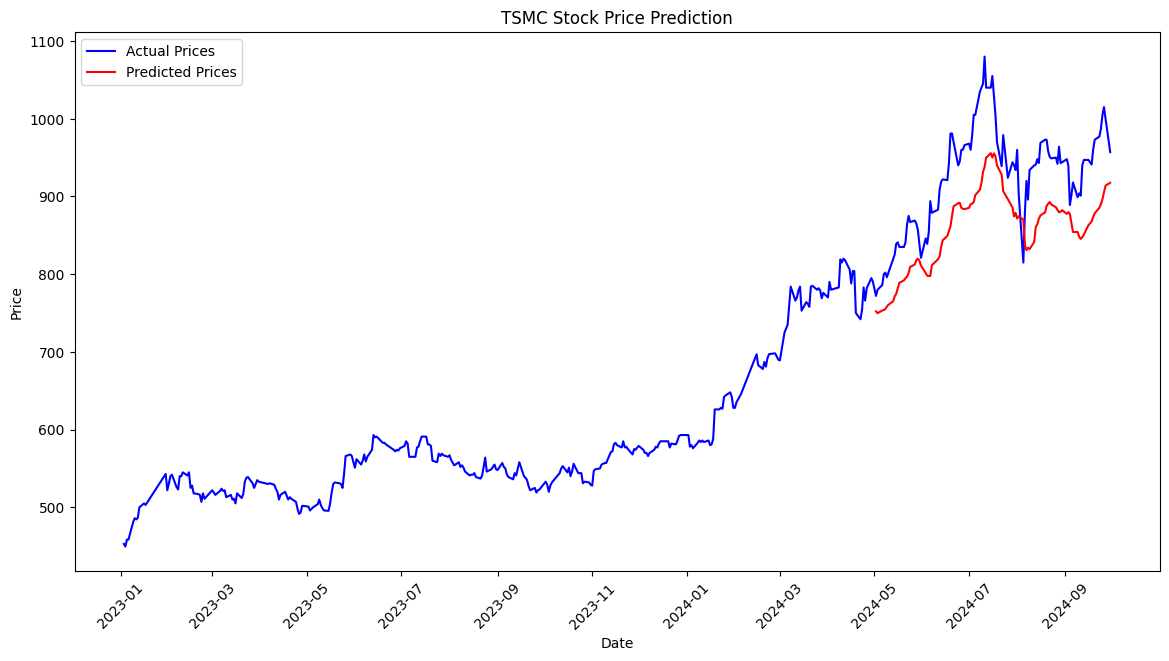

In [42]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 下載股票數據
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2023-01-01", end="2024-10-01")
    return data

# 數據預處理
def preprocess_data(data, n_days, target_start_date):
    close_prices = data['Close'].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices.reshape(-1, 1))

    x, y = [], []
    for i in range(len(scaled_data) - n_days):
        if data.index[i + n_days] < target_start_date:  # 確保只添加訓練數據
            x.append(scaled_data[i:i + n_days].flatten())
            y.append(scaled_data[i + n_days])

    return np.array(x), np.array(y), scaler, scaled_data

# 下載數據並進行預處理
data = get_stock_data()
n_days = 5  # 預測 N 日後的股價
target_start_date = pd.to_datetime("2024-05-01").tz_localize(data.index.tz)  # 設定預測目標的開始日期，並與數據時區對齊
x, y, scaler, scaled_data = preprocess_data(data, n_days, target_start_date)

# 檢查 x 和 y 的長度是否一致
if len(x) != len(y):
    print(f"Length of x: {len(x)}, Length of y: {len(y)}")
    raise ValueError("x 和 y 的長度不一致")

# 分割數據集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 構建神經網絡模型
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(n_days,)),  # 第一層
    layers.Dense(32, activation='relu'),              # 第二層
    layers.Dense(1)                         # 輸出層
])

# 設定損失函數和優化器
model.compile(optimizer='sgd', loss='mean_squared_error')

# 訓練模型
num_epochs = 100
model.fit(x_train, y_train, epochs=num_epochs, batch_size=32, verbose=0)

# 使用滑動窗口生成預測
predictions = []
for i in range(len(scaled_data) - n_days):
    input_data = scaled_data[i:i + n_days].flatten().reshape(1, -1)  # 形狀 (1, n_days)
    if data.index[i + n_days] >= target_start_date:  # 確保不包含訓練數據
        pred = model.predict(input_data, verbose=0)
        predictions.append(pred[0][0])

# 將預測值和實際值反向縮放
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# 獲取所有日期的實際收盤價
actual_prices = data['Close'].values[len(data) - len(predictions):]

# 可視化結果
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')  # 顯示所有實際數據
plt.plot(data.index[len(data) - len(predictions):], predictions, label='Predicted Prices', color='red')  # 顯示預測數據
plt.title('TSMC Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## CNN

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.1930, Test Accuracy: 0.9310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


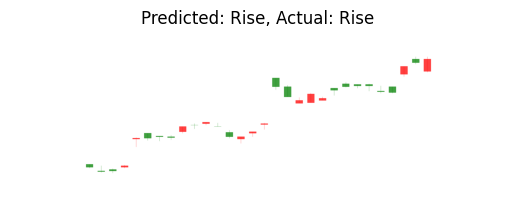

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


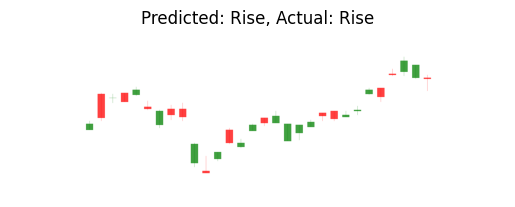

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


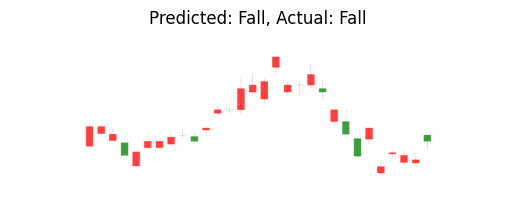

In [108]:
import yfinance as yf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import mpl_finance as mpf

# 下載股票數據並標註漲跌
def get_stock_data():
    ticker = "2330.TW"
    data = yf.download(ticker, start="2024-01-01", end="2024-10-01")
    data['5_MA'] = data['Close'].rolling(window=5).mean()
    data['10_MA'] = data['Close'].rolling(window=10).mean()
    data['label'] = np.where(data['5_MA'] > data['10_MA'], 1, 0)  # 5日均線高於10日均線標註「漲」
    return data.dropna()

# 生成 K 線圖並保存為圖像，使用 candlestick2_ochl
def save_candlestick_chart(data, start_index, end_index, output_dir='kk_charts'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    segment = data.iloc[start_index:end_index]
    segment.index = segment.index.map(lambda x: x.strftime('%Y-%m-%d'))  # 格式化日期

    fig = plt.figure(figsize=(24, 8))
    ax = fig.add_subplot(1, 1, 1)

    # 設置 x 軸刻度與標籤
    ax.set_xticks(range(0, len(segment.index), 10))
    ax.set_xticklabels(segment.index[::10])
    ax.axis('off')
    # 使用 candlestick2_ochl 生成 K 線圖
    mpf.candlestick2_ochl(ax, segment['Open'], segment['Close'], segment['High'],
                          segment['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

    # 保存圖像
    file_name = f"{output_dir}/chart_{start_index}_{end_index}.png"
    plt.savefig(file_name)
    plt.close()
    return file_name

# 創建 CNN 數據集
def create_dataset(data, lookback_days=30):
    X, y = [], []
    for i in range(len(data) - lookback_days):
        file_name = save_candlestick_chart(data, i, i + lookback_days)
        image = img_to_array(load_img(file_name, target_size=(64, 64)))  # 圖像轉為數據
        X.append(image)
        y.append(data['label'].iloc[i + lookback_days - 1])  # 設定標籤
    return np.array(X), np.array(y)

# 創建 CNN 模型
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # 二分類問題
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 可視化實際與預測結果
def plot_prediction_vs_actual(data, model, lookback_days=30):
    for i in range(0, len(data) - lookback_days, 50):  # 每隔50天可視化一次
        X_sample, y_true = create_dataset(data.iloc[i:i + lookback_days + 1])
        y_pred = model.predict(np.expand_dims(X_sample[0], axis=0))

        # 可視化K線圖與預測結果
        file_name = save_candlestick_chart(data, i, i + lookback_days)
        img = plt.imread(file_name)
        plt.imshow(img)
        plt.title(f"Predicted: {'Rise' if y_pred > 0.5 else 'Fall'}, Actual: {'Rise' if y_true[0] == 1 else 'Fall'}")
        plt.axis('off')
        plt.show()

# 主程序：下載數據、訓練模型、可視化結果
data = get_stock_data()  # 下載股票數據
data.columns = data.columns.droplevel(1)

X, y = create_dataset(data)  # 構建數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 切分訓練與測試集

model = create_cnn_model()  # 創建模型
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test),verbose=0)  # 訓練模型

# 評估模型並打印結果
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

plot_prediction_vs_actual(data, model)  # 可視化預測結果

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [73]:
pip install --upgrade mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00
